<a href="https://colab.research.google.com/github/achanhon/coursdeeplearningcolab/blob/master/basic_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [2]:
transform_mnist = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32,32)),
    torchvision.transforms.ToTensor()
])
mnisttrain = torchvision.datasets.MNIST("./mnist",train=True, transform=transform_mnist, download=True)
trainloader = torch.utils.data.DataLoader(mnisttrain, batch_size=128, shuffle=True, num_workers=2)

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
class MonReseau(nn.Module):
    def __init__(self):
        super(MonReseau, self).__init__()
        
        self.conv11 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv12 = nn.Conv2d(32, 32, kernel_size=3, padding=1)

        self.conv21 = nn.Conv2d(32,64, kernel_size=3, padding=1)
        self.conv22 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

        self.conv31 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        
        self.final = nn.Conv2d(128, 10, kernel_size=4)
      
    def forward(self, x):
        x = F.leaky_relu(self.conv11(x))
        x = F.leaky_relu(self.conv12(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = F.leaky_relu(self.conv21(x))
        x = F.leaky_relu(self.conv22(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = F.leaky_relu(self.conv31(x))
        x = F.leaky_relu(self.conv32(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        x = self.final(x)
        x = x.view(-1,10)
        return x

monreseau = MonReseau()

epoch 0
	loss= 2.301084142464858


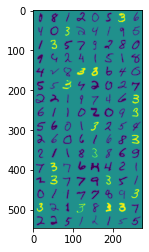

	loss= 2.2978103182337306


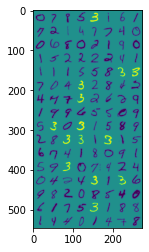

	loss= 2.289668922775362


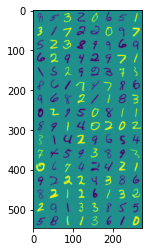

	loss= 1.6160783669352532


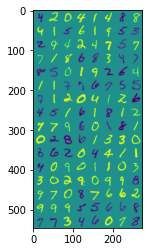

epoch 1
	loss= 1.5424160599708556


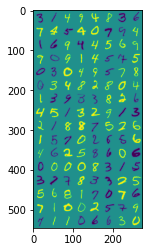

	loss= 1.6130971306562423


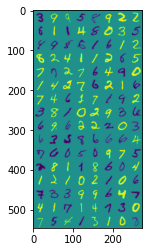

	loss= 1.6658413434028625


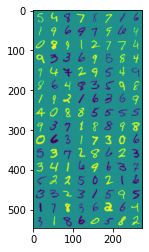

	loss= 1.6499872928857804


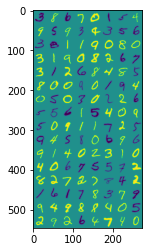

	loss= 1.250603473186493


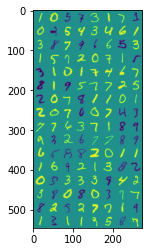

	loss= 1.23978122651577


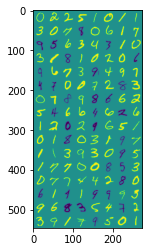

	loss= 1.229530362188816


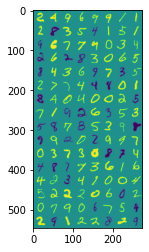

epoch 2


KeyboardInterrupt: ignored

In [4]:
###la boucle d'apprentissage
import collections
import random
import matplotlib.pyplot as plt
optimizer = optim.Adam(monreseau.parameters(), lr=0.00001)
losses = collections.deque(maxlen=200)
criterion = nn.CrossEntropyLoss()

for epoch in range(10):
  monreseau.train()
  print("epoch", epoch)
  for inputs, targets in trainloader:
    mespredictions = monreseau(inputs)
    loss = criterion(mespredictions,targets)

    losses.append(loss.cpu().data.numpy())
    loss.backward()
    optimizer.step()

    if random.randint(0,90)==0:
      print("\tloss=",(sum(losses)/len(losses)))
  
      #sortie visuelle
      _,mespredictions = mespredictions.max(1)
      mespredictions = (mespredictions==targets).float()
      mespredictions = mespredictions.unsqueeze(-1)
      mespredictions = mespredictions.unsqueeze(-1)
      mespredictions = mespredictions.unsqueeze(-1)
      tmp = torch.nn.AdaptiveAvgPool2d((inputs.shape[2],inputs.shape[3]))
      mespredictions = tmp(mespredictions)

      visu = inputs*mespredictions-inputs*(1-mespredictions)
      np_imagegrid = torchvision.utils.make_grid(visu).numpy()
      plt.imshow(np_imagegrid[0])
      plt.show()
      plt.pause(0.001)
